### Here  I have Import  the all library  wchich I need

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from keras.models import sequential
from  keras.layers import Dense,Flatten,Activation
from  tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold               

### I have imported the cifar10 dataset from keras datasets below

In [14]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

### I have change  the label data(y)  type to categorical

In [15]:
#x_train_reshaped = x_train.reshape(len(x_train),32*32*3)
#x_test_reshaped = x_test.reshape(len(x_test),32*32*3)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

### I have change the input data(x) to float type and and normalize between 0 to 1

In [16]:
#x_train_reshaped = x_train_reshaped.astype("float32")/255
#x_test_reshaped = x_test_reshaped.astype("float32")/255
x_train =  x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

### I have define two function (result_plotting,CustomCallback) below to visualize the train and validation data accuracy

In [17]:
class CustomCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(epoch % 2 ==0):
      print(" Finished epoch #",epoch)
      print('Accuracy resched train is',logs.get('accuracy'))
      print('Accuracy reached val is',logs.get('val_accuracy'))
      print()
      return

In [18]:
def result_plotting():
  plt.figure(figsize=[8,6])
  plt.plot(history.history['accuracy'],'blue',linewidth=3.0)
  plt.plot(history.history['val_accuracy'],'red',ls='--',linewidth=3.0)
  plt.legend(['Training Accuracy','Validaion Accuracy'],fontsize=18,loc='lower right')
  plt.xlabel('Epochs',fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)

In [19]:
cc=CustomCallback()

### I have create the model1 neural network,compile,fit the neural network to train  the dataset 

In [20]:
model1 = keras.Sequential([
                          keras.layers.Flatten(),
                          keras.layers.Dense(512,activation = "relu"),
                          keras.layers.Dense(256,activation  = "relu"),
                          keras.layers.Dense(10,activation = "softmax")
])

In [21]:
model1.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [22]:
history  = model1.fit(x_train,y_train_cat,epochs = 20,verbose =  0,validation_data = (x_test,y_test_cat),callbacks = [cc])

 Finished epoch # 0
Accuracy resched train is 0.3344399929046631
Accuracy reached val is 0.39329999685287476

 Finished epoch # 2
Accuracy resched train is 0.43522000312805176
Accuracy reached val is 0.44130000472068787

 Finished epoch # 4
Accuracy resched train is 0.4629800021648407
Accuracy reached val is 0.4778999984264374

 Finished epoch # 6
Accuracy resched train is 0.48236000537872314
Accuracy reached val is 0.4447999894618988

 Finished epoch # 8
Accuracy resched train is 0.4977400004863739
Accuracy reached val is 0.47369998693466187

 Finished epoch # 10
Accuracy resched train is 0.5103600025177002
Accuracy reached val is 0.484499990940094

 Finished epoch # 12
Accuracy resched train is 0.5200200080871582
Accuracy reached val is 0.4839000105857849

 Finished epoch # 14
Accuracy resched train is 0.5297799706459045
Accuracy reached val is 0.48919999599456787

 Finished epoch # 16
Accuracy resched train is 0.5354400277137756
Accuracy reached val is 0.49709999561309814

 Finished

### I have drawn the train and validation data accuracy after each epochs to find the overfitting and calcutate the minimum epochs need to train the model1. In model1  there is some overfitting after 10 epochs.here minimum epochs need to train model1 is about **10 epochs**

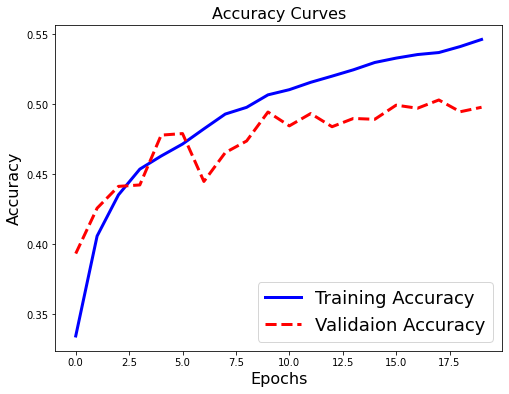

In [23]:
result_plotting()

### This is the **validation data accuracy(0.4977999925613403) after 20 epochs**

In [24]:
model1.evaluate(x_test,y_test_cat)[1]

313/313 [==============================] - 1s 3ms/step - loss: 1.4501 - accuracy: 0.4978


0.49779999256134033

### I have create the **model2** neural network with convolution ;layers,maxpooling layers, dropout layers as **improved neural network from model1** and ,compile,fit the neural network to train  the dataset

In [25]:
model2 = keras.Sequential([
                           keras.layers.Conv2D(32,(3,3),activation = "relu",input_shape = (32,32,3)),
                           keras.layers.MaxPooling2D((2,2)),
                           #keras.layers.Dropout(0.2),
                           keras.layers.Conv2D(64,(3,3),activation = "relu"),
                           keras.layers.MaxPooling2D((2,2)),
                           #keras.layers.Dropout(0.2),
                           keras.layers.Conv2D(128,(3,3),activation = "relu"),
                           keras.layers.MaxPooling2D((2,2)),
                           #keras.layers.Dropout(0.2),
                           keras.layers.Flatten(),
                           keras.layers.Dense(512,activation = "relu"),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(256,activation  = "relu"),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10,activation = "softmax")
])

In [26]:
model2.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [27]:
history = model2.fit(x_train,y_train_cat,epochs = 20,verbose  =   0,validation_data = (x_test,y_test_cat),callbacks = [cc])

 Finished epoch # 0
Accuracy resched train is 0.450300008058548
Accuracy reached val is 0.5394999980926514

 Finished epoch # 2
Accuracy resched train is 0.67194002866745
Accuracy reached val is 0.6567000150680542

 Finished epoch # 4
Accuracy resched train is 0.7438600063323975
Accuracy reached val is 0.6956999897956848

 Finished epoch # 6
Accuracy resched train is 0.7890999913215637
Accuracy reached val is 0.7225000262260437

 Finished epoch # 8
Accuracy resched train is 0.826479971408844
Accuracy reached val is 0.72079998254776

 Finished epoch # 10
Accuracy resched train is 0.8535799980163574
Accuracy reached val is 0.7224000096321106

 Finished epoch # 12
Accuracy resched train is 0.8734800219535828
Accuracy reached val is 0.713699996471405

 Finished epoch # 14
Accuracy resched train is 0.8906199932098389
Accuracy reached val is 0.7282000184059143

 Finished epoch # 16
Accuracy resched train is 0.9034799933433533
Accuracy reached val is 0.7207000255584717

 Finished epoch # 18
A

### I have drawn the train and validation data accuracy after each epochs to find the overfitting calcutate the minimum epochs need to train the model2.in model2 overfitting happenning. here minimum epochs need to train model2 is about **5 epochs** this is less compare with the model1 


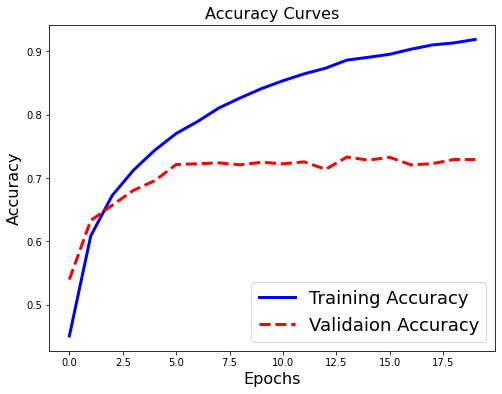

In [28]:
result_plotting()

### below is the validation data accuracy(0.729200005531311) after 20 epochs.accuracy for validation data has increased in model2(0.729200005531311) compare with model1(0.4977999925613403).by using additional layers like maxpooling,dropout,convolution layers.**But in model2 overfitting happenning compare with model1**

In [29]:
model2.evaluate(x_test,y_test_cat)[1]

313/313 [==============================] - 1s 5ms/step - loss: 1.1762 - accuracy: 0.7292


0.729200005531311

### **I have created the model3 which is exactly same neuralnetwork,compile parameters like model2**.But **I have train the model3 using  by  using augmented images wchich was created by ImageDataGenerator**.and train the model3 

In [30]:
model3 = keras.Sequential([
                           keras.layers.Conv2D(32,(3,3),activation = "relu",input_shape = (32,32,3)),
                           keras.layers.MaxPooling2D((2,2)),
                           #keras.layers.Dropout(0.2),
                           keras.layers.Conv2D(64,(3,3),activation = "relu"),
                           keras.layers.MaxPooling2D((2,2)),
                           #keras.layers.Dropout(0.2),
                           keras.layers.Conv2D(128,(3,3),activation = "relu"),
                           keras.layers.MaxPooling2D((2,2)),
                           #keras.layers.Dropout(0.2),
                           keras.layers.Flatten(),
                           keras.layers.Dense(512,activation = "relu"),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(256,activation  = "relu"),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10,activation = "softmax")
])

In [31]:
model3.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [32]:
datagen = ImageDataGenerator(zoom_range = 0.2,horizontal_flip=True)#,height_shift_range = 0.5,rotation_range = 90,brightness_range=[0.2,1])
history = model3.fit_generator(datagen.flow(x_train,y_train_cat),epochs = 20,verbose =  0,validation_data = (x_test,y_test_cat),callbacks = [cc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


 Finished epoch # 0
Accuracy resched train is 0.41571998596191406
Accuracy reached val is 0.5404000282287598

 Finished epoch # 2
Accuracy resched train is 0.6168799996376038
Accuracy reached val is 0.6603000164031982

 Finished epoch # 4
Accuracy resched train is 0.6700999736785889
Accuracy reached val is 0.6880000233650208

 Finished epoch # 6
Accuracy resched train is 0.7042999863624573
Accuracy reached val is 0.7103999853134155

 Finished epoch # 8
Accuracy resched train is 0.7229999899864197
Accuracy reached val is 0.7378000020980835

 Finished epoch # 10
Accuracy resched train is 0.7410399913787842
Accuracy reached val is 0.7336999773979187

 Finished epoch # 12
Accuracy resched train is 0.7489799857139587
Accuracy reached val is 0.7530999779701233

 Finished epoch # 14
Accuracy resched train is 0.7599599957466125
Accuracy reached val is 0.7502999901771545

 Finished epoch # 16
Accuracy resched train is 0.7682600021362305
Accuracy reached val is 0.7531999945640564

 Finished epoc

### I have drawn the train and validation data accuracy after each epochs to find the overfitting and calcutate the minimum epochs need to train the model3. in model3 there is **no overfitting**. here minimum epochs need to train model2 is about **20 epochs**.by using the image data augmnetation we could prevent the overfitting in model3

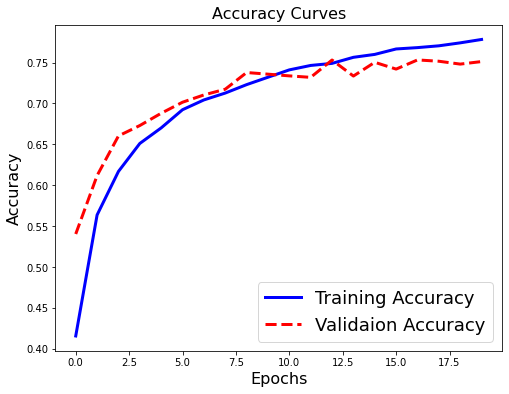

In [33]:
result_plotting()

### below in model3 the validation data accuracy(0.7512000203132629) after 20 epochs.here accuracy for validation data has increased in model3(0.7512000203132629) compare with model1(0.4977999925613403) and model2(0.729200005531311).By train the model3 using augmented image datasets 

In [34]:
model3.evaluate(x_test,y_test_cat)[1]

313/313 [==============================] - 1s 5ms/step - loss: 0.7504 - accuracy: 0.7512


0.7512000203132629

### I have merege the train and test datasets together to split the dataset randomly  using KFold method  

In [35]:
x = np.concatenate((x_train,x_test),axis = 0)
y = np.concatenate((y_train_cat,y_test_cat),axis = 0)

### Here in the below model4 I have use the same neural network model and compile parameters like model1 and model2, but I have train the model using shuffled train datasets using KFold. the average accuracy for test data in model4  is 0.7177333354949951


In [49]:
kfold = KFold(n_splits = 5,shuffle = True)
accuracy = []
history_list = []
for train,test in kfold.split(x,y):
  model4 = keras.Sequential([
                           keras.layers.Conv2D(32,(3,3),activation = "relu",input_shape = (32,32,3)),
                           keras.layers.MaxPooling2D((2,2)),
                           #keras.layers.Dropout(0.2),
                           keras.layers.Conv2D(64,(3,3),activation = "relu"),
                           keras.layers.MaxPooling2D((2,2)),
                           #keras.layers.Dropout(0.2),
                           keras.layers.Conv2D(128,(3,3),activation = "relu"),
                           keras.layers.MaxPooling2D((2,2)),
                           #keras.layers.Dropout(0.2),
                           keras.layers.Flatten(),
                           keras.layers.Dense(512,activation = "relu"),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(256,activation  = "relu"),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10,activation = "softmax")
  ])
  model4.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
  )
  history = model4.fit(x[train],y[train],epochs = 20,verbose =  0,validation_data = (x_test,y_test_cat),callbacks = [cc])
  history_list.append(history)
  accuracy.append(model4.evaluate(x[test],y[test])[1])
np.mean(accuracy)

 Finished epoch # 0
Accuracy resched train is 0.4247291684150696
Accuracy reached val is 0.5570999979972839

 Finished epoch # 2
Accuracy resched train is 0.6372291445732117
Accuracy reached val is 0.6902999877929688

 Finished epoch # 4
Accuracy resched train is 0.7035624980926514
Accuracy reached val is 0.7411999702453613

 Finished epoch # 6
Accuracy resched train is 0.7477083206176758
Accuracy reached val is 0.774399995803833

 Finished epoch # 8
Accuracy resched train is 0.7799791693687439
Accuracy reached val is 0.8026000261306763

 Finished epoch # 10
Accuracy resched train is 0.8098958134651184
Accuracy reached val is 0.8173999786376953

 Finished epoch # 12
Accuracy resched train is 0.8301458358764648
Accuracy reached val is 0.8554999828338623

 Finished epoch # 14
Accuracy resched train is 0.8510624766349792
Accuracy reached val is 0.8482999801635742

 Finished epoch # 16
Accuracy resched train is 0.863979160785675
Accuracy reached val is 0.8723999857902527

 Finished epoch #

0.7177333354949951

### I have drawn the train and validation data accuracy after each epochs to find the overfitting and calcutate the minimum epochs need to train the model4. in model4 there is **no overfitting**. here minimum epochs need to train model4 is about **20 epochs**.This is achieved by shuffle the data by using KFold methode.but in the model1 and model2 there is overfitting. but in the model4 overfittig prevent by the data shuffle by using KFold

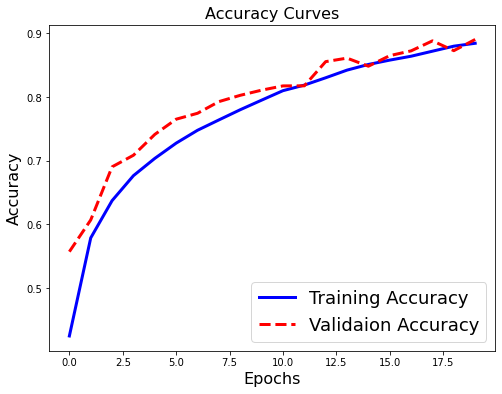

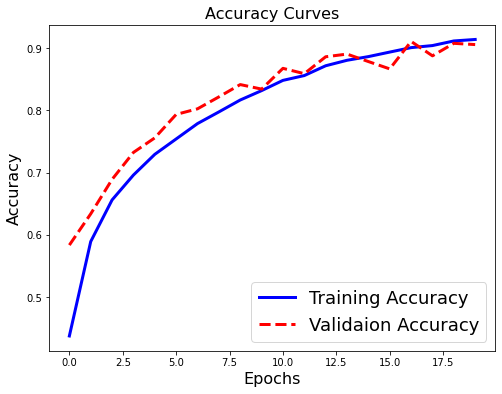

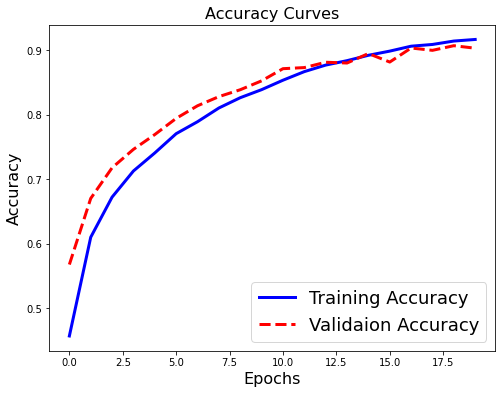

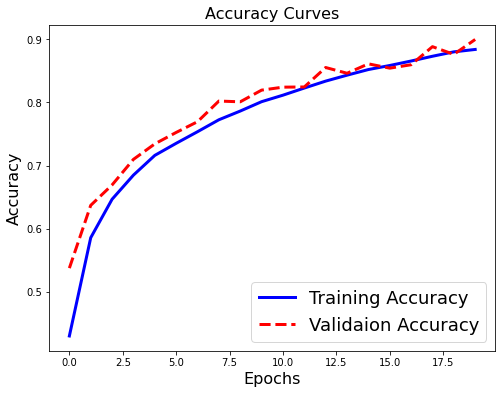

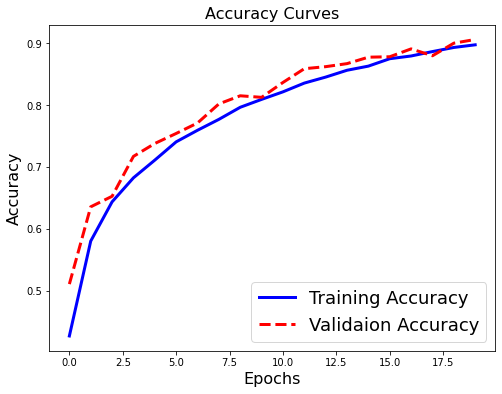

In [50]:
for i in range(len(history_list)):
  history =  history_list[i]
  result_plotting()

### As conclusion we can train the model for high  accuracy by using the maxpooling layers and covolution layers. **And we can prevent  the overfitting by using dropout layers and  image data augmentation**  